# **Project Name**    -  Book Recommendation System



## 1. Introduction

This project aimed to create a book recommendation system using unsupervised learning techniques. The project involved exploring and analyzing the data, visualizing relationships between variables, and experimenting with different charts to gain insights. The data was pre-processed and cleaned to handle missing values and outliers. Several recommender systems were built, including popularity-based filtering, correlation-based recommendations, collaborative filtering using cosine similarity and k-nearest neighbors. The project demonstrated the potential of these techniques to generate personalized book recommendations for users.

The book crossing dataset comprises of 3 files: Books, Users, and Ratings. The books csv contains 271360 rows and 8 columns. The users csv contains 278858 rows and 3 columns. The ratings csv contains 1149780 rows and 3 columns. There are almost 40% missing values in the age column of the user csv.

The main objective of the project was to create a book recommendation system for users. Recommender systems are algorithms aimed at suggesting relevant items to users. They are critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.

The project involved data wrangling, including renaming columns, changing datatypes, creating new columns from existing ones, and replacing errors in the data. Data visualization was used to understand the relationships between variables and gain insights from the data.

Several recommender systems were built, including popularity-based filtering, which ranks books based on their average rating and the number of ratings they have received; recommendations based on correlation, which generates recommendations for a specific book among books that have been rated a sufficient number of times; collaborative filtering using cosine similarity (User-User), which calculates the average rating for each book among the k most similar users to the input user; and collaborative filtering using k-nearest neighbors [kNN], which finds the k nearest neighbors of the input book and returns their ISBNs along with their distance to the input book.

Future work includes saving the best performing machine learning model in a pickle or joblib file format for deployment on a live server for real user interaction.

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

## 2. Preparation

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Dataset Loading

In [3]:
# Load Dataset
book_url = "book_dataset/Books.csv"
users_url = "book_dataset/Users.csv"
ratings_url = "book_dataset/Ratings.csv"

books = pd.read_csv(book_url)
users = pd.read_csv(users_url)
ratings = pd.read_csv(ratings_url)

C:\Users\hungt\AppData\Local\Temp\ipykernel_33204\3056670820.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(book_url)


## 3. Quick Look

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


We can see:

The books dataset contains the following columns:
- **ISBN**: International Standard Book Number, a unique identifier for each book
- **Book-Title**: The title of the book
- **Book-Author**: The author of the book
- **Year-Of-Publication**: The year the book was published
- **Publisher**: The publisher of the book
- **Image-URL-S**: Small image URL of the book cover
- **Image-URL-M**: Medium image URL of the book cover
- **Image-URL-L**: Large image URL of the book cover

The dataset contains book metadata with URLs pointing to book cover images in different sizes.

In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


The users dataset contains the following columns:
- **User-ID**: A unique identifier for each user
- **Location**: The geographic location of the user (city, state/territory, country)
- **Age**: The age of the user

Notable observations:
- The dataset contains 278,858 rows and 3 columns
- There are missing values (NaN) in the Age column, representing approximately 40% of the data
- Location data is formatted as a comma-separated string including city, region, and country information

In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


The ratings dataset contains the following columns:
- **User-ID**: A unique identifier for the user who gave the rating
- **ISBN**: The International Standard Book Number of the book that was rated
- **Book-Rating**: The rating given by the user to the book

Notable observations:
- The dataset contains 1,149,780 rows and 3 columns
- This is the largest dataset among the three (books, users, ratings)
- Book-Rating    : Explicit = rating on a scale of 1 - 10 (higher value denoting higher appreciation) or Implicit expressed by 0
- The dataset connects users and books through their ratings, forming the basis for building recommendation systems
- A user can rate multiple books, and a book can be rated by multiple users

In [7]:
# Dataset Duplicate Value Count
print(books.duplicated().sum())
print(users.duplicated().sum())
print(ratings.duplicated().sum())

0
0
0


**Duplicate Analysis:**

The results show:
- **Books dataset**: 0 duplicate rows
- **Users dataset**: 0 duplicate rows  
- **Ratings dataset**: 0 duplicate rows

All three datasets have no duplicate rows, which is a positive indicator for data quality. This means:
- Each book entry is unique
- Each user entry is unique
- Each rating entry (user-book rating combination) is unique

This clean state indicates the datasets are well-prepared for analysis and no deduplication is necessary.

In [8]:
#### Missing Values/Null Values
def missing_values(dataframe):
  '''The function will calculate the missing values and present it in a tabular form '''
  # Calculate the number of missing values in each column
  missing_values_count = dataframe.isnull().sum()

  # Calculate the percentage of missing values in each column
  missing_values_percentage = round(dataframe.isnull().mean().mul(100), 2)

  # Create a table containing the number and percentage of missing values
  missing_values_table = pd.concat([missing_values_count, missing_values_percentage], axis=1)
  missing_values_table = missing_values_table.rename(columns={0: 'Count of Missing Values', 1: '[% of Total Value]'})

  # Sort the table by the percentage of missing values in descending order
  missing_values_table = missing_values_table.sort_values('[% of Total Value]', ascending=False)

  # Reset the index of the table
  missing_values_table = missing_values_table.reset_index().rename(columns={'index': 'Column Name'})

  return missing_values_table


In [9]:
missing_values(books)

,Column Name,Count of Missing Values,[% of Total Value]
0,ISBN,0,0.0
1,Book-Title,0,0.0
2,Book-Author,2,0.0
3,Year-Of-Publication,0,0.0
4,Publisher,2,0.0
5,Image-URL-S,0,0.0
6,Image-URL-M,0,0.0
7,Image-URL-L,3,0.0


In [10]:
missing_values(users)

,Column Name,Count of Missing Values,[% of Total Value]
0,Age,110762,39.72
1,User-ID,0,0.00
2,Location,0,0.00


In [11]:
missing_values(ratings)

,Column Name,Count of Missing Values,[% of Total Value]
0,User-ID,0,0.0
1,ISBN,0,0.0
2,Book-Rating,0,0.0


## Missing Values Analysis

**Books Dataset:**
- No missing values across all columns (ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L)
- Data quality is excellent for this dataset

**Users Dataset:**
- **Age column**: 110,762 missing values (39.72% of total)
- **User-ID and Location**: No missing values
- The Age column has significant missing data that will need to be addressed during preprocessing

**Ratings Dataset:**
- No missing values across all columns (User-ID, ISBN, Book-Rating)
- Complete data with no gaps, ensuring reliable ratings information

**Key Observations:**
- The main data quality issue is in the Users dataset with ~40% missing ages
- Books and Ratings datasets are complete with no missing values
- Missing age values in the users dataset will require imputation or removal strategies for analysis

## 4. EDA

In [12]:
# renaming all the columns for ease of use
books.rename(columns={'ISBN':'isbn', 'Book-Title':'book_title',
                      'Book-Author':'book_author',
                      'Year-Of-Publication':'year_of_publication',
                      'Publisher':'publisher','Image-URL-S':'img_s',
                      'Image-URL-M': 'img_m', 'Image-URL-L':'img_l'}
        , inplace=True)

In [13]:
# changing the url from http to https for deployment
def change_url(url):
    if isinstance(url,str):
        url=url.replace('http','https')
    return url

books['img_s']=books['img_s'].apply(change_url)
books['img_m']=books['img_m'].apply(change_url)
books['img_l']=books['img_l'].apply(change_url)

In [14]:
users.rename(columns={'User-ID':'user_id', 'Location':'location', 'Age':'age'}
        , inplace=True)

In [15]:
ratings.rename(columns={'User-ID':'user_id', 'ISBN':'isbn',
                      'Book-Rating':'book_rating'}
        , inplace=True)

In [16]:
books['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [17]:
books['year_of_publication'] = pd.to_numeric(books['year_of_publication'], errors='coerce')
users['user_id'] = users['user_id'].astype(int)
users['age'] = pd.to_numeric(users['age'], errors='coerce')
ratings['user_id'] = ratings['user_id'].astype(int)
ratings['book_rating'] = ratings['book_rating'].astype(int)

**In the unique values, we see that the value 0, and values more than 2006 for year_of_publication is invalid and as this dataset was published in 2004.**

**We will assume that the years after 2006 are invalid and replace them with NAN.**

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [18]:
books.loc[(books['year_of_publication'] > 2006) | (books['year_of_publication'] == 0),'year_of_publication'] = np.nan

In [19]:
location = users.location.str.split(', ', n=2, expand=True)
location.columns=['city', 'state', 'country']

users['city'] = location['city']
users['state'] = location['state']
users['country'] = location['country']

In [20]:
users

,user_id,location,age,city,state,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom
...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,portland,oregon,usa
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,washington,united kingdom
278855,278856,"brampton, ontario, canada",NaN,brampton,ontario,canada
278856,278857,"knoxville, tennessee, usa",NaN,knoxville,tennessee,usa


In [21]:
users.country.unique()

array(['usa', 'russia', 'portugal', ..., 'la svizzera', 'hernando',
       'united kingdom.'], shape=(1131,), dtype=object)

In [22]:
users['country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

C:\Users\hungt\AppData\Local\Temp\ipykernel_33204\3914490809.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users['country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],


In [23]:
users.head()

,user_id,location,age,city,state,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom


#### Merging the dataset

In [24]:
# Merging the dataframe using userid and isbn columns
data = pd.merge(users, ratings, on = 'user_id')
data = pd.merge(data, books, on='isbn')
data.head()

,user_id,location,age,city,state,country,isbn,book_rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,2,"stockton, california, usa",18.0,stockton,california,usa,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,https://images.amazon.com/images/P/0195153448....,https://images.amazon.com/images/P/0195153448....,https://images.amazon.com/images/P/0195153448....
1,8,"timmins, ontario, canada",NaN,timmins,ontario,canada,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....
2,8,"timmins, ontario, canada",NaN,timmins,ontario,canada,0060973129,0,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,https://images.amazon.com/images/P/0060973129....,https://images.amazon.com/images/P/0060973129....,https://images.amazon.com/images/P/0060973129....
3,8,"timmins, ontario, canada",NaN,timmins,ontario,canada,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,https://images.amazon.com/images/P/0374157065....,https://images.amazon.com/images/P/0374157065....,https://images.amazon.com/images/P/0374157065....
4,8,"timmins, ontario, canada",NaN,timmins,ontario,canada,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,https://images.amazon.com/images/P/0393045218....,https://images.amazon.com/images/P/0393045218....,https://images.amazon.com/images/P/0393045218....


In [25]:
data.shape

(1031136, 15)

In [26]:
# Removing the unwanted columns
data_2 = data.drop(['location','img_s','img_m','img_l'], axis = 1)

In [27]:
data_2.head()

,user_id,age,city,state,country,isbn,book_rating,book_title,book_author,year_of_publication,publisher
0,2,18.0,stockton,california,usa,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,8,NaN,timmins,ontario,canada,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,8,NaN,timmins,ontario,canada,0060973129,0,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,8,NaN,timmins,ontario,canada,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,8,NaN,timmins,ontario,canada,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


### What all manipulations have you done and insights you found?

**Renamed all the columns for the 3 csv, changed the required datatypes for some columns.**

**Created a country, city and state column from the location column.**

**Replaced most of the errors in the country column.**

**Limited the year of publication as per the book crossing dataset.**

#### Chart - 1 - Age Distribution

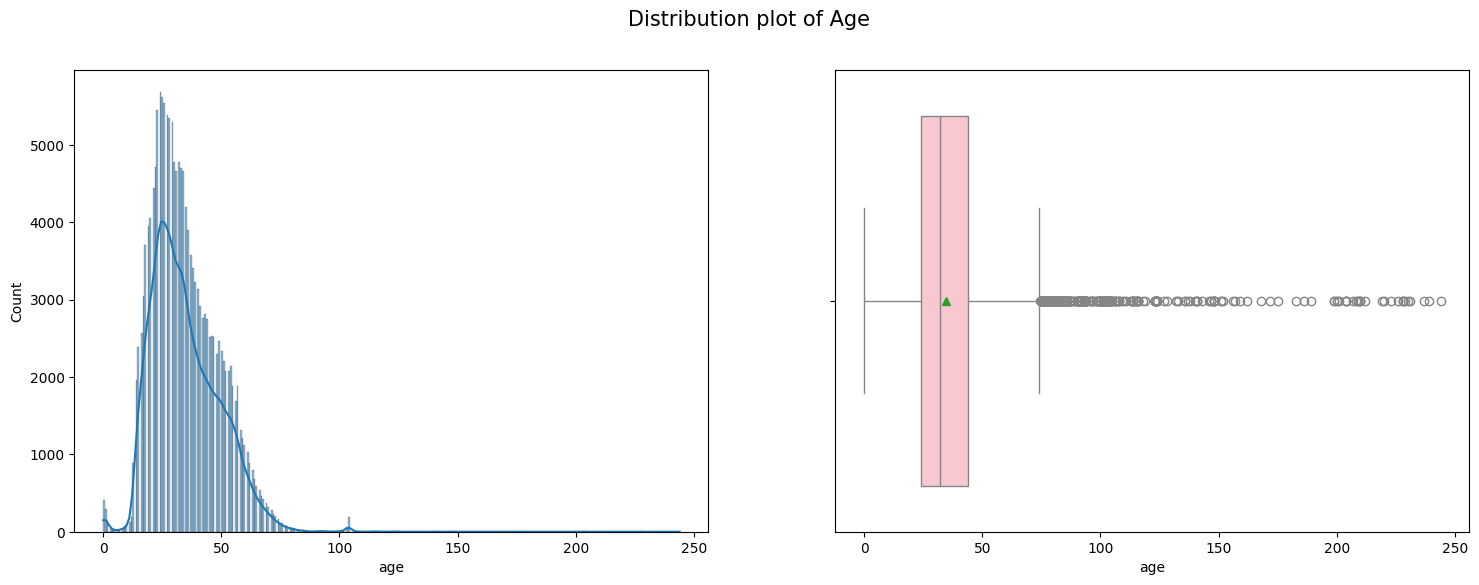

In [28]:
# Age Distribution
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.histplot(users['age'], ax = axes[0],kde = True)
sns.boxplot(users['age'], ax = axes[1],orient='h',showmeans=True,color='pink')
fig.suptitle("Distribution plot of Age", fontsize = 15)
plt.show()

##### 1. Why pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

**From the distribution it appears that the age column is positively skewed (right skewed).**

**The boxplot shows that there are a lot of outliers present.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the histogram and boxplot could potentially help in creating a positive business impact by allowing for a better understanding of the data and its distribution. Understanding the distribution of age and the presence of outliers could help in creating more accurate and personalized book recommendations for users. However, additional analysis and data may be necessary to achieve the business goal of creating an effective book recommendation system.

#### Chart - 2 - Book Rating Distribution

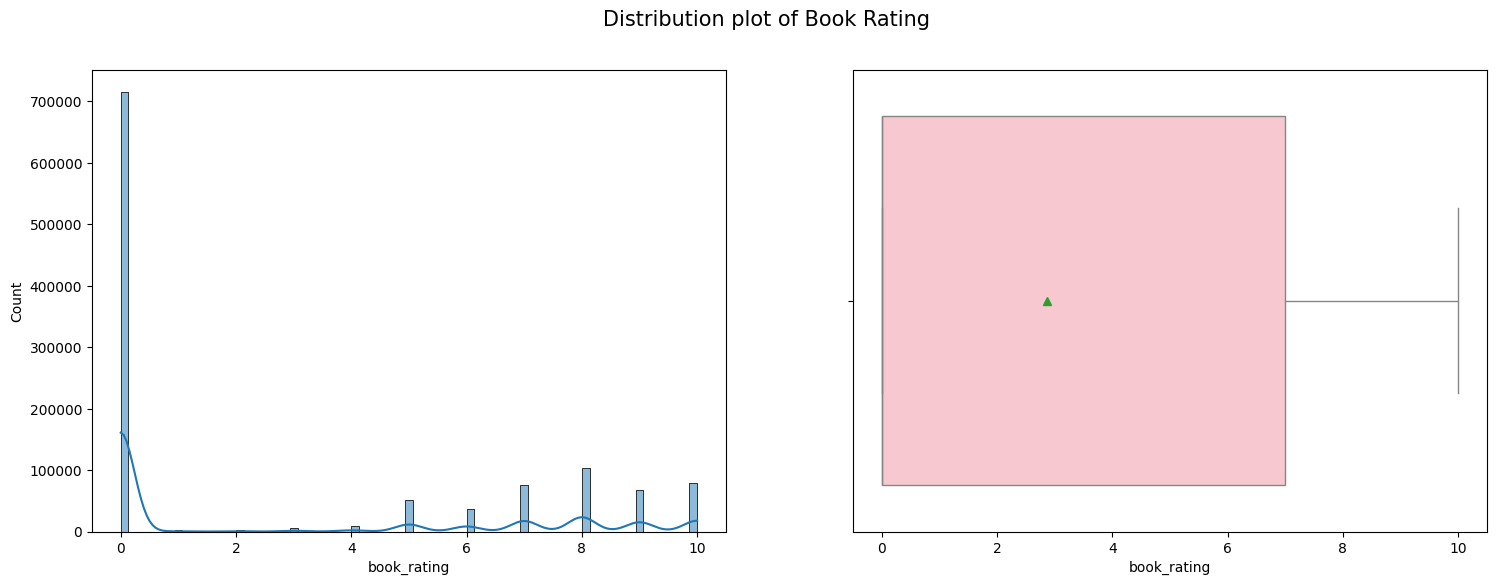

In [29]:
# Rating Distribution
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.histplot(ratings['book_rating'], ax = axes[0],kde = True)
sns.boxplot(ratings['book_rating'], ax = axes[1], orient='h',showmeans=True,color='pink')
fig.suptitle("Distribution plot of Book Rating", fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

**We see that there are a lot of zeros (implicit ratings) thats the reason the boxplot is flushed to the left side.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights alone may not be sufficient to create a positive business impact and additional analysis and data may be necessary to achieve the business goal of creating an effective book recommendation system.

#### Chart - 3 - Explicit Ratings

In [30]:
explicit = ratings[ratings['book_rating']!=0]

In [31]:
plt.show()

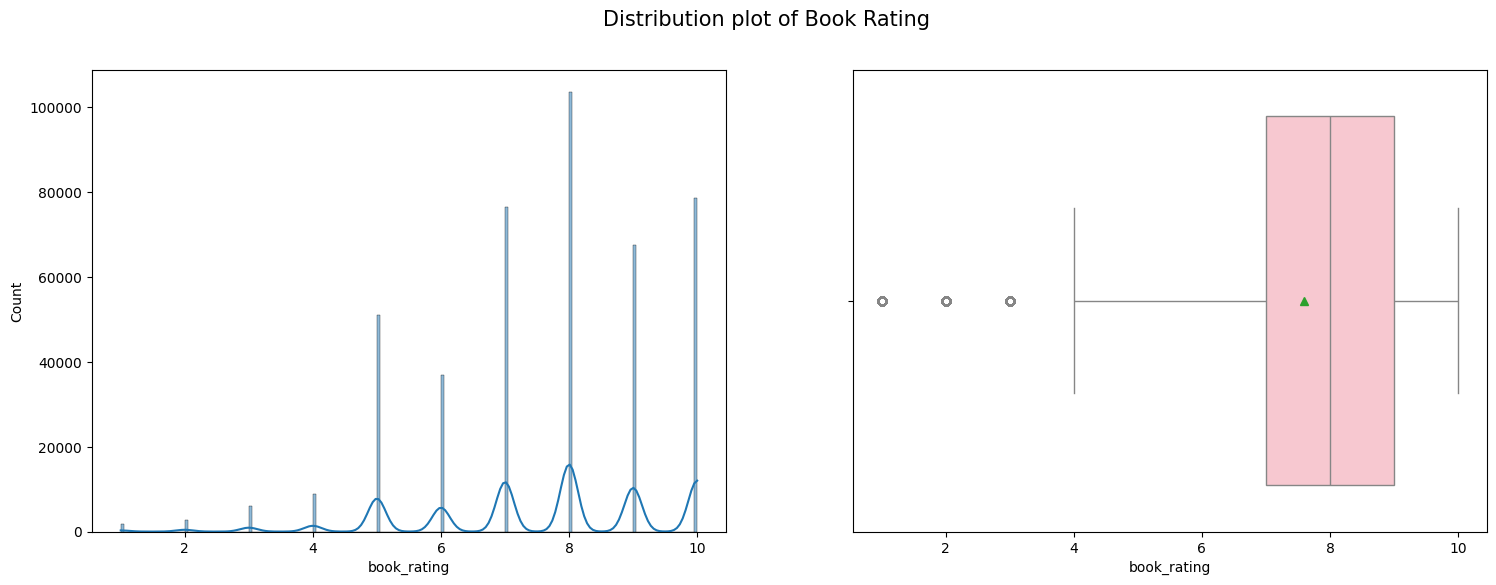

In [32]:
# Explicit Rating Distribution
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.histplot(explicit['book_rating'], ax = axes[0],kde = True)
sns.boxplot(x=explicit['book_rating'], ax = axes[1], orient='h', showmeans=True, color='pink')
fig.suptitle("Distribution plot of Book Rating", fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

**The explicit ratings are from 1 to 10, the histogram shows that the most count of ratings is 8.**

**The boxplots shows that the median is 8 and mean is somewhere close to 7.5**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights alone may not be sufficient to create a positive business impact and additional analysis and data may be necessary to achieve the business goal of creating an effective book recommendation system.

#### Chart - 4 - Year of Publication

In [33]:
year = books['year_of_publication'].value_counts().reset_index()
year.columns = ['year', 'count']
year = year.sort_values(by='count', ascending=False).head(15)
year['year']='Year '+year['year'].astype(int).astype(str)

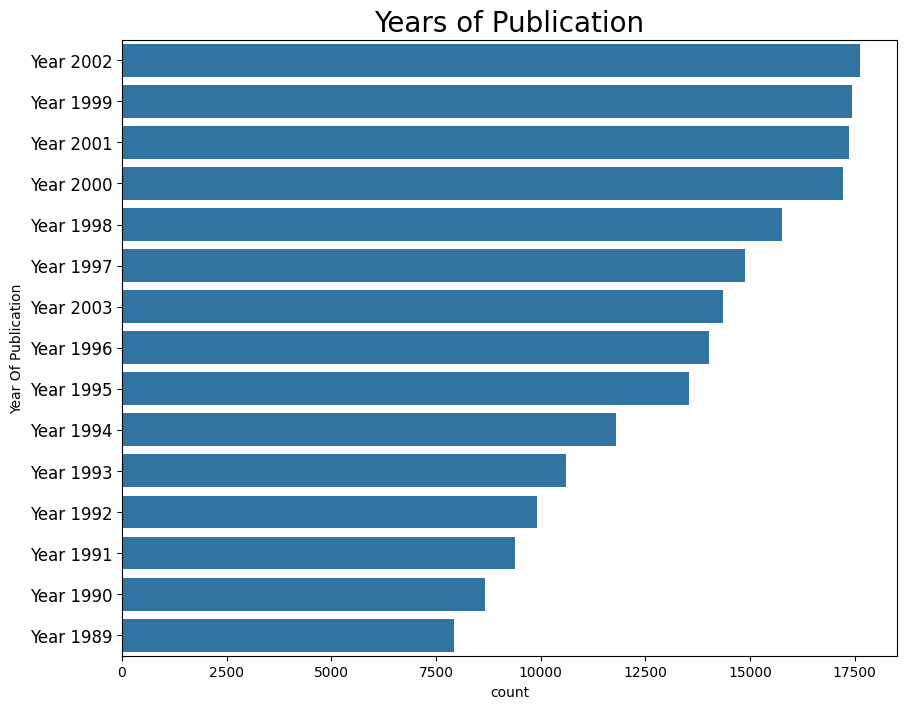

In [34]:
# Year of publication
plt.figure(figsize=(10,8))
sns.barplot(x='count',y='year',data=year, orient = 'h')
plt.ylabel('Year Of Publication')
plt.yticks(size=12)
plt.title('Years of Publication',size=20)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

**The bar chart shows that the most number of books were published in the year 2002 followed by 1999 and 2001.**

**It appears that there are twice as many books published in 2002 than in 1989.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the bar chart, such as the number of books published in different years, could potentially help in creating a positive business impact by allowing for a better understanding of the data and its distribution. This information could be used to improve the recommendation system by taking into account the publication year when making recommendations.

#### Function for bar plot

In [35]:
def bar_plot(df,col,label):
    plot_df = df[col].value_counts().head(15).reset_index()
    plot_df.columns=[col,'count']

    plt.figure(figsize=(10,8))
    sns.barplot(x='count',y=col,data=plot_df)
    plt.ylabel(label)
    plt.title(label,size=20)
    plt.show()

#### Chart - 5 - Top Book Title

In [36]:
data_2[data_2['book_title']=='Wild Animus']['book_title'].count()

np.int64(2502)

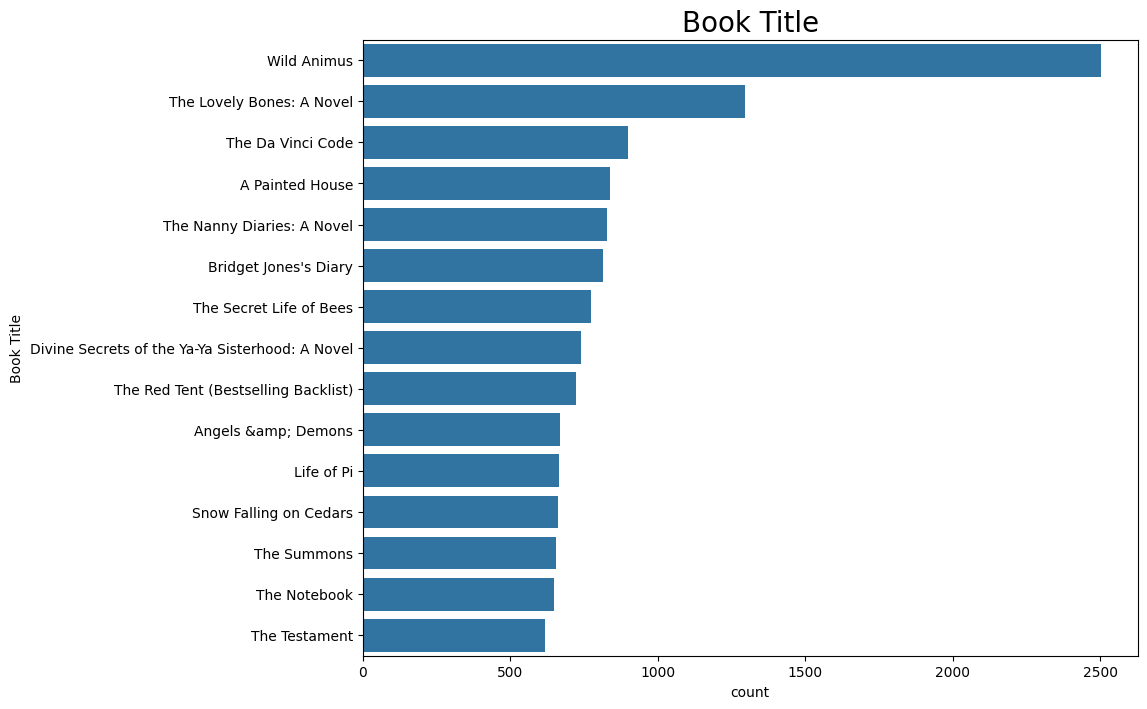

In [37]:
# Top books by number of ratings
bar_plot(data_2, 'book_title', 'Book Title')

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

**The most rated book is Wild Animus with 2502 ratings, followed by The Lovely Bones:A Novel and The Da Vinci Code.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the bar chart, such as the most rated books, could potentially help in creating a positive business impact by allowing for a better understanding of the data and its distribution. This information could be used to improve the recommendation system by taking into account the popularity of books when making recommendations.

#### Chart - 6 - Top Book Author

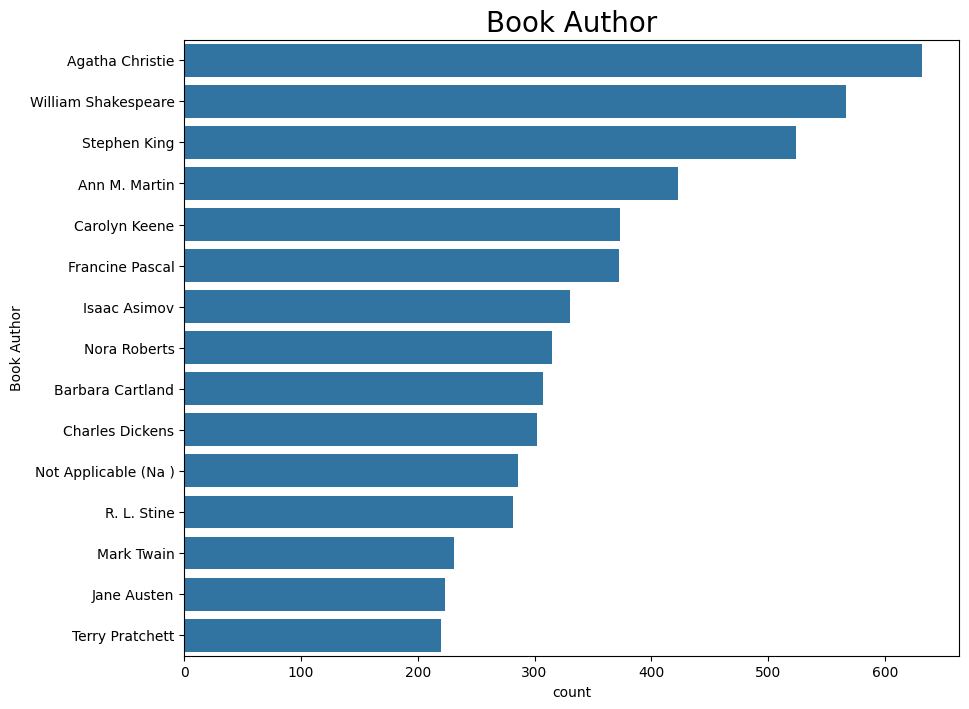

In [38]:
# Plot of book author based on number of books
bar_plot(books, 'book_author', 'Book Author')

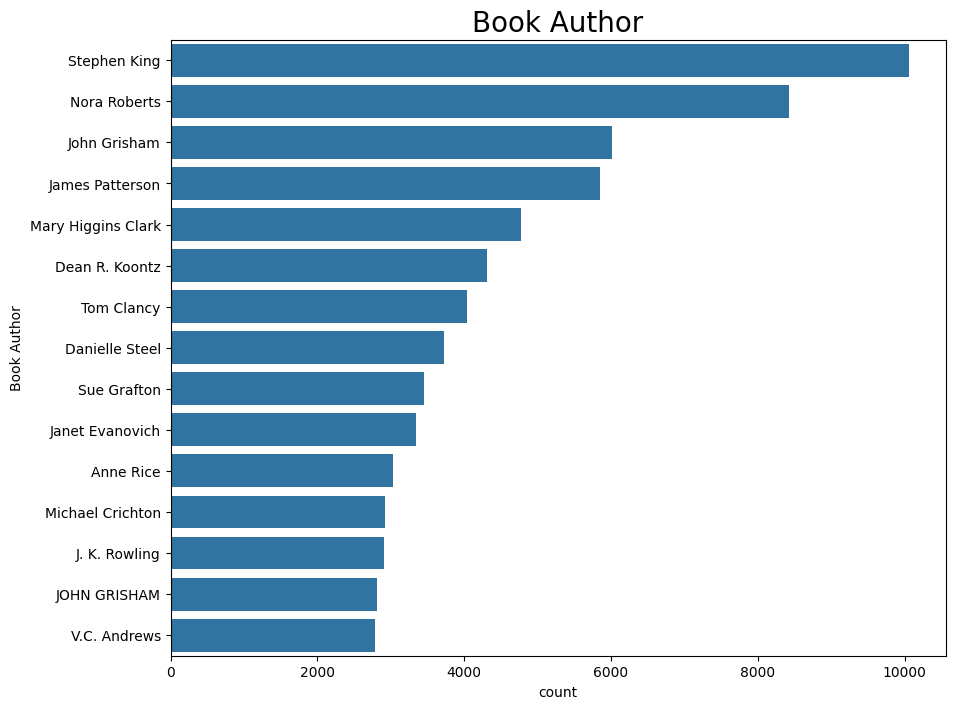

In [39]:
# Plot of book author based on number of reviews
bar_plot(data_2, 'book_author', 'Book Author')

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

**The top author is Agatha Christie as per the number of books followed by William Shakespeare and for the most number of ratings is Nora Roberts followed by Stephen King.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the top authors based on the number of books and ratings, could potentially help in creating a positive business impact. This information could be used to improve the recommendation system by taking into account the popularity of authors when making recommendations. For example, books by popular authors such as Agatha Christie and Nora Roberts could be recommended to users who have shown an interest in similar genres or themes.

#### Chart - 7 - Book Publisher

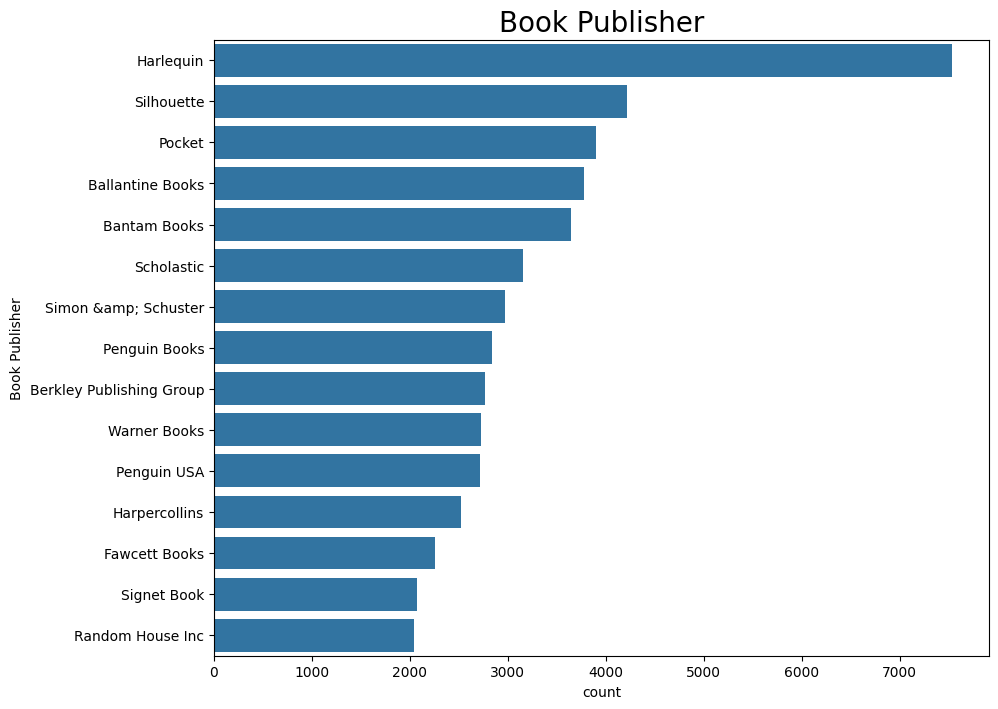

In [40]:
# plot of book publishers based on number of books
bar_plot(books, 'publisher', 'Book Publisher')

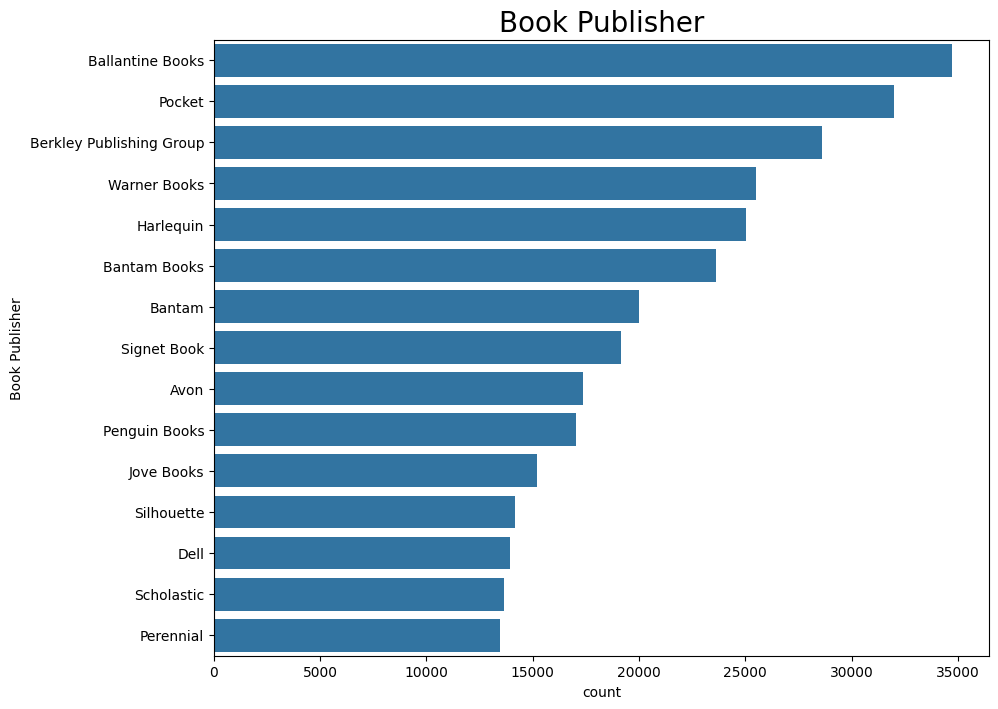

In [41]:
# plot of book publishers based on number of reviews
bar_plot(data_2, 'publisher', 'Book Publisher')

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

**The most number of books are published by Harleyquin and also the most number of rated books publisher is Harleyquin.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the most popular publisher based on the number of books and ratings, could potentially help in creating a positive business impact. This information could be used to improve the recommendation system by taking into account the popularity of publishers when making recommendations. For example, books published by popular publishers such as Harlequin could be recommended to users who have shown an interest in similar genres or themes.

#### Chart - 8 - Top Countries

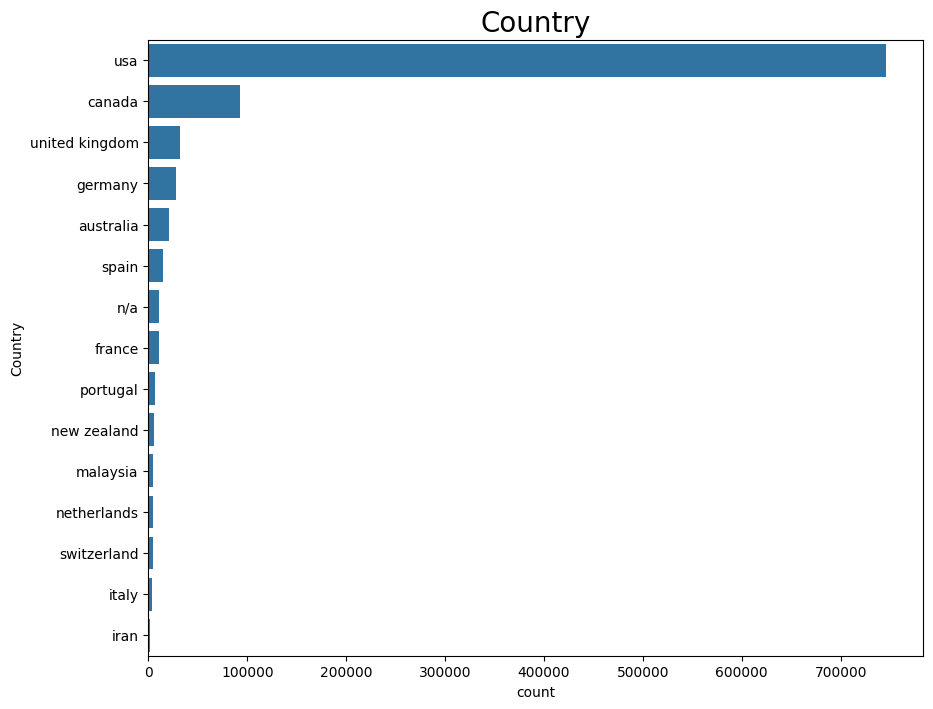

In [42]:
# Top 10 books by number of books
bar_plot(data_2, 'country', 'Country')

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

**The most number of users are from USA followed by Canada. The remaining countries have comparatively less users who rate the books.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the distribution of users by country, could potentially help in creating a positive business impact. This information could be used to improve the recommendation system by taking into account the location of users when making recommendations. For example, books that are popular or relevant in specific countries such as the USA and Canada could be recommended to users from those countries.

#### Chart - Pair Plot

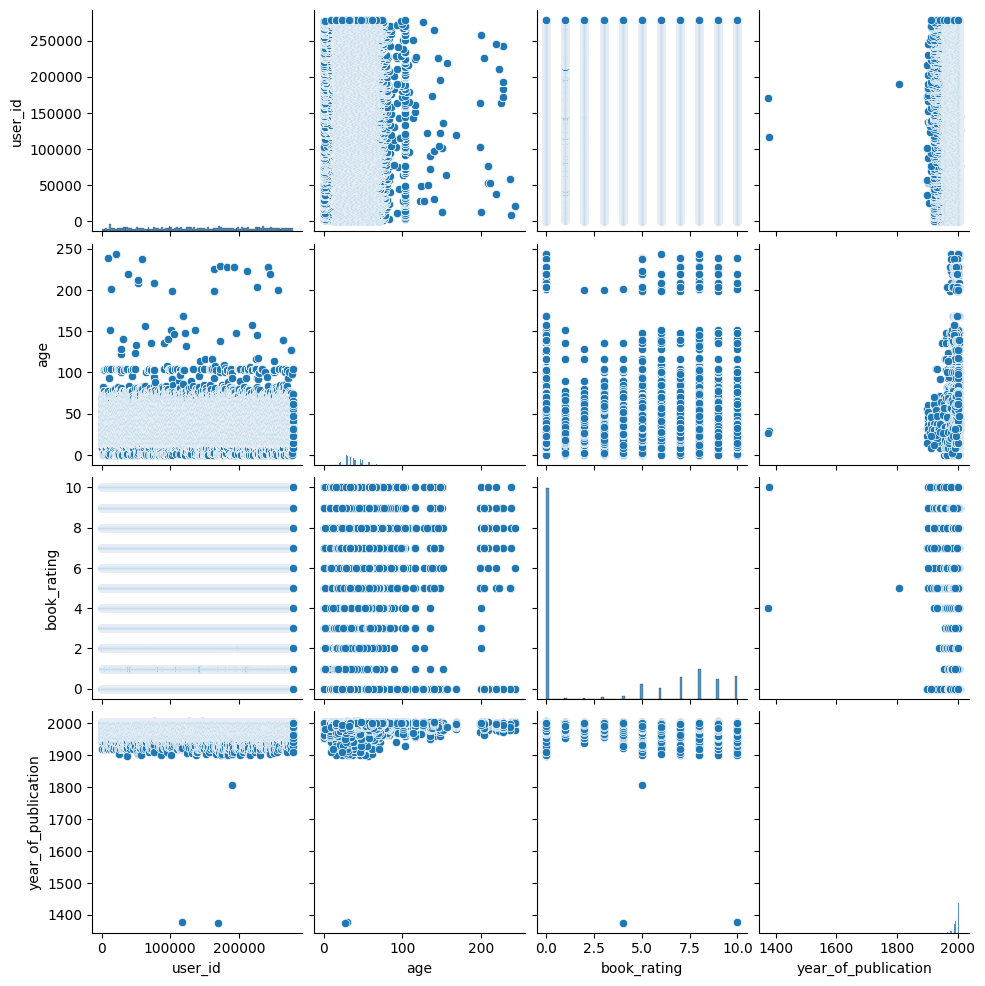

In [43]:
# Pair Plot
sns.pairplot(data_2)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

**In the pair plot not much insight is gained.**